In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv" # our input file
raw_data = pd.read_csv(input_path, header=0,skiprows=None,index_col=None,delimiter=",")
raw_data

,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,False,94,0,40,3,0,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,False,40,0,1687,0,0,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,True,48,1,18,0,0,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,False,109,0,110,14,0,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,False,50,1,26560,1,0,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,131,0,521,2,0,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,False,40,1,16262,0,0,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,False,56,0,16261,0,0,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,False,20,0,36466,29,0,3,5.666667,6.350853,13,0,0.000000,0.000000,0


In [3]:
def parseLine(line):
    label = line["malicious"]
    vector = line[1:]
    # print(vector)
    vector = np.array(vector,dtype=float)
    return (label, vector)

In [4]:
labelsAndData = raw_data.apply(parseLine, axis=1)
labelsAndData = labelsAndData.apply(pd.Series)
labelsAndData

,0,1
0,False,"[94.0, 0.0, 40.0, 3.0, 0.0, 2.0, 2.5, 0.707106..."
1,False,"[40.0, 0.0, 1687.0, 0.0, 0.0, 2.0, 5.0, 2.8284..."
2,True,"[48.0, 1.0, 18.0, 0.0, 0.0, 2.0, 6.0, 4.242640..."
3,False,"[109.0, 0.0, 110.0, 14.0, 0.0, 2.0, 4.5, 3.535..."
4,False,"[50.0, 1.0, 26560.0, 1.0, 0.0, 2.0, 8.0, 7.071..."
...,...,...
99996,True,"[131.0, 0.0, 521.0, 2.0, 0.0, 2.0, 4.0, 1.4142..."
99997,False,"[40.0, 1.0, 16262.0, 0.0, 0.0, 2.0, 5.0, 2.828..."
99998,False,"[56.0, 0.0, 16261.0, 0.0, 0.0, 2.0, 9.5, 9.192..."
99999,False,"[20.0, 0.0, 36466.0, 29.0, 0.0, 3.0, 5.6666666..."


In [5]:
data = labelsAndData[1]
n = data.count()
print("Number of connections:", n)
print("Details per connection:", len(data.iloc[0]))

Number of connections: 100001
Details per connection: 13


In [6]:
data = data.apply(pd.Series)

In [7]:
def clusteringScore(data, k, withCenters=False):
    clusters = KMeans(n_clusters=k, max_iter=10, init="random").fit(data)
    # calculate mean square error
    if withCenters is True:
        return (clusters.inertia_, len(clusters.cluster_centers_))
    return clusters.inertia_

In [8]:
def normalizeData(labelsAndData):
     # calculate means
    means = labelsAndData.apply(lambda x : x[1], axis=1).mean()
    # print(means)
    # calculate standard deviation of each feature
    stdevs = np.sqrt(labelsAndData.apply(lambda x : ((x[1]-means)**2), axis=1).mean())
    # print(stdevs)
    stdevs[stdevs==0] = 1
    def normalize(point):
        return (point[0],(point[1]-means)/stdevs)
    return labelsAndData.apply(lambda x: normalize(x), axis=1)
labelsAndDataNorm = normalizeData(labelsAndData)
normalizedData = labelsAndDataNorm.map(lambda x:x[1])
normalizedData = normalizedData.apply(pd.Series)
normalizedData

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.752206,-0.645232,-0.693312,-0.150316,-0.024706,-0.44713,-1.542406,-1.202851,-1.312538,0.725688,0.185049,-0.172525,0.053146
1,-0.457890,-0.645232,-0.536463,-0.183670,-0.024706,-0.44713,-0.445480,-0.525579,-0.535702,-0.523130,0.417441,0.100272,0.113168
2,-0.278617,1.549830,-0.695408,-0.183670,-0.024706,-0.44713,-0.006709,-0.074064,-0.147285,-0.166325,-0.096789,-0.206865,-0.186943
3,1.088344,-0.645232,-0.686646,-0.028017,-0.024706,-0.44713,-0.664865,-0.299821,-0.535702,2.152910,-0.258309,-0.058017,0.053146
4,-0.233798,1.549830,1.832273,-0.172552,-0.024706,-0.44713,0.870832,0.828967,0.629551,-0.523130,0.615222,0.825801,0.473302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1.581347,-0.645232,-0.647505,-0.161434,-0.024706,-0.44713,-0.884250,-0.977094,-0.924120,4.650547,-0.418491,-0.192970,-0.186943
99997,-0.457890,1.549830,0.851561,-0.183670,-0.024706,-0.44713,-0.445480,-0.525579,-0.535702,-0.166325,-0.156123,-0.130357,-0.186943
99998,-0.099343,-0.645232,0.851466,-0.183670,-0.024706,-0.44713,1.528988,1.506240,1.212178,0.190480,-0.253600,-0.063222,-0.066898
99999,-0.906074,-0.645232,2.775654,0.138755,-0.024706,0.32674,-0.152966,0.599024,0.629551,-1.058338,-0.868133,-0.524086,-0.667121


In [9]:
k_vector = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
scores = [clusteringScore(normalizedData, k, withCenters=True) for k in k_vector]
for i, score in enumerate(scores):
    print("k = %3d, (effective nr. of clusters = %3d) WSSSE = %d" %(k_vector[i], score[1], score[0]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

k =  20, (effective nr. of clusters =  20) WSSSE = 305922
k =  30, (effective nr. of clusters =  30) WSSSE = 241093
k =  40, (effective nr. of clusters =  40) WSSSE = 203527
k =  50, (effective nr. of clusters =  50) WSSSE = 187650
k =  60, (effective nr. of clusters =  60) WSSSE = 171991
k =  70, (effective nr. of clusters =  70) WSSSE = 157021
k =  80, (effective nr. of clusters =  80) WSSSE = 148303
k =  90, (effective nr. of clusters =  90) WSSSE = 143540
k = 100, (effective nr. of clusters = 100) WSSSE = 135052
k = 110, (effective nr. of clusters = 110) WSSSE = 130966
k = 120, (effective nr. of clusters = 120) WSSSE = 122528
k = 130, (effective nr. of clusters = 130) WSSSE = 120400
k = 140, (effective nr. of clusters = 140) WSSSE = 112790
k = 150, (effective nr. of clusters = 150) WSSSE = 111107
k = 160, (effective nr. of clusters = 160) WSSSE = 104551


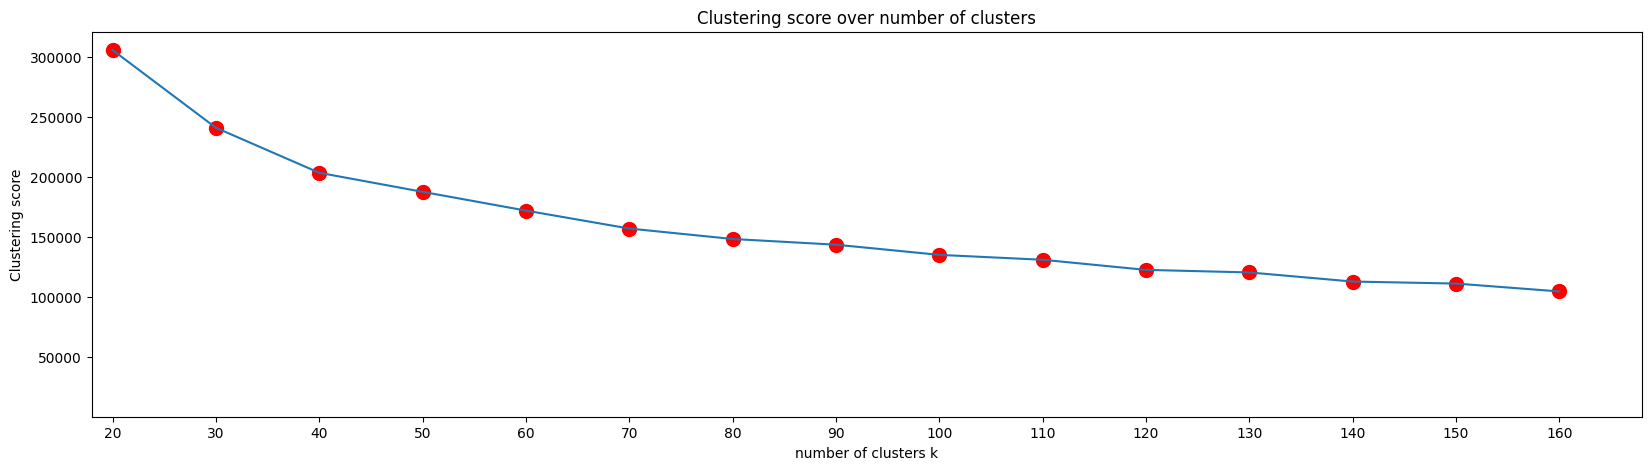

In [10]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[0] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([18, 1.05*np.max(k_vector), 0.85*np.min(scores), 1.05*np.max(scores)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering score")
plt.title("Clustering score over number of clusters")
plt.xticks(k_vector)
plt.show()

In [11]:
# train with 140
clusters = KMeans(n_clusters=140, max_iter=1000, init="random").fit(normalizedData)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

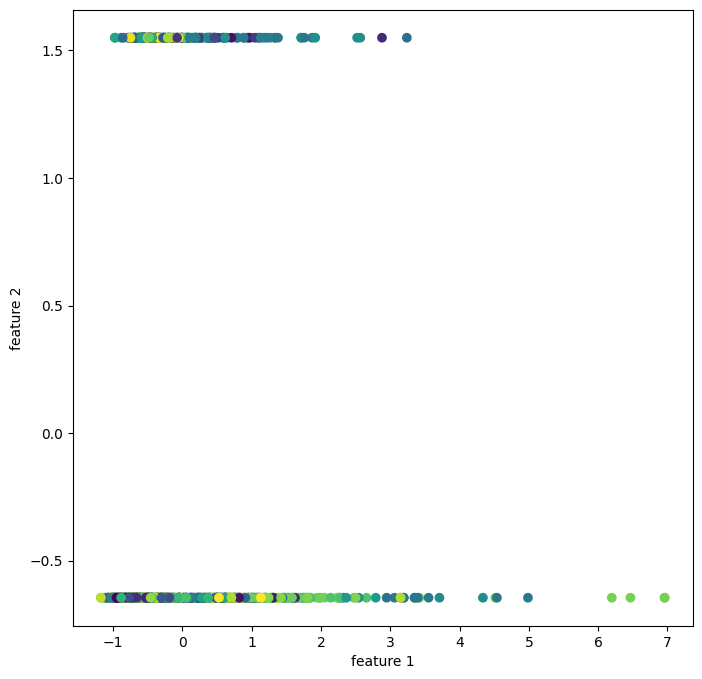

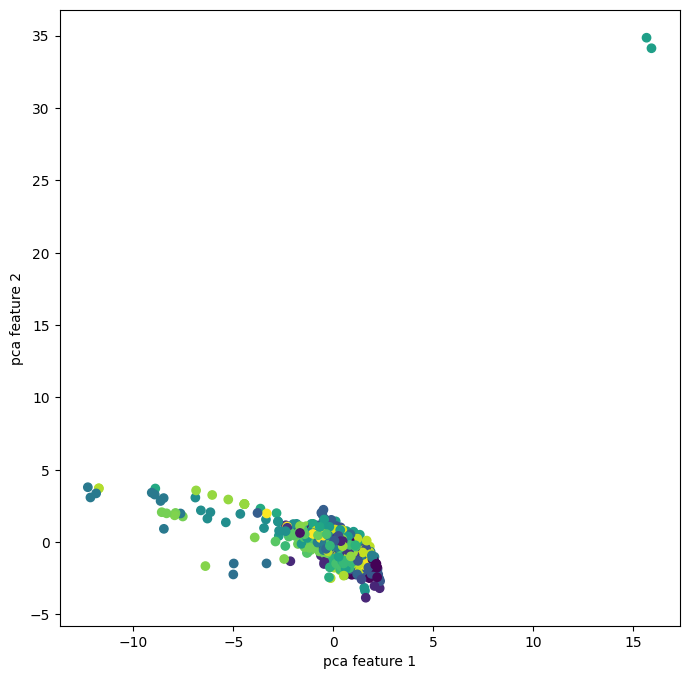

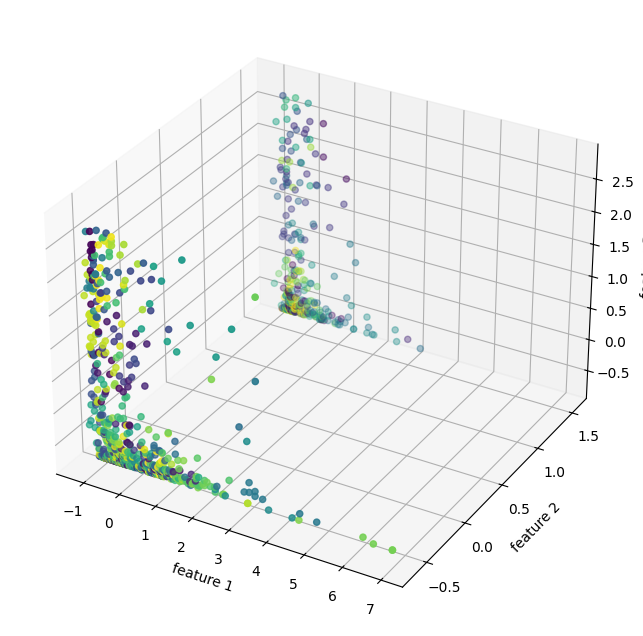

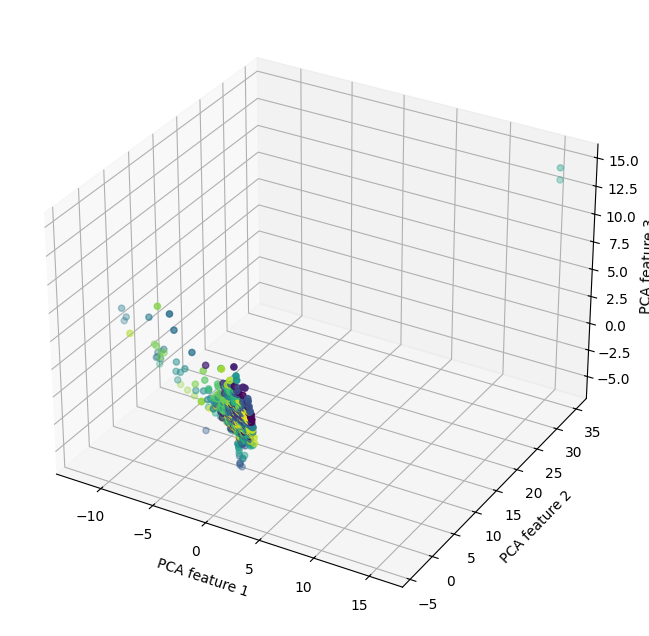

In [12]:
sampled = normalizedData.sample(replace=False, frac=0.01)
datax = sampled[0]
datay = sampled[1]
dataz = sampled[2]
pcaData = pd.DataFrame(PCA(n_components=3).fit_transform(sampled))
labels_ = clusters.predict(sampled)

#non-pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(datax, datay, c=labels_)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

#pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(pcaData[0], pcaData[1], c=labels_)
plt.xlabel('pca feature 1')
plt.ylabel('pca feature 2')
plt.show()

#non-pca cluster plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(datax, datay, dataz, c=labels_)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

#pca plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pcaData[0], pcaData[1], pcaData[2],c=labels_)
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.show()

In [13]:
i = 0
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))
def error(prediction, point):
    global i
    closest_center = clusters.cluster_centers_[prediction[i]]
    i += 1
    return euclidean_distance(closest_center, point)

In [14]:
predictions = clusters.predict(normalizedData)
ordered = normalizedData.apply(lambda x : (error(predictions, x), x), axis=1).sort_values(key=0, ascending=False)
predictions

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

array([ 43,  18, 134, ...,  80,  60,  59])

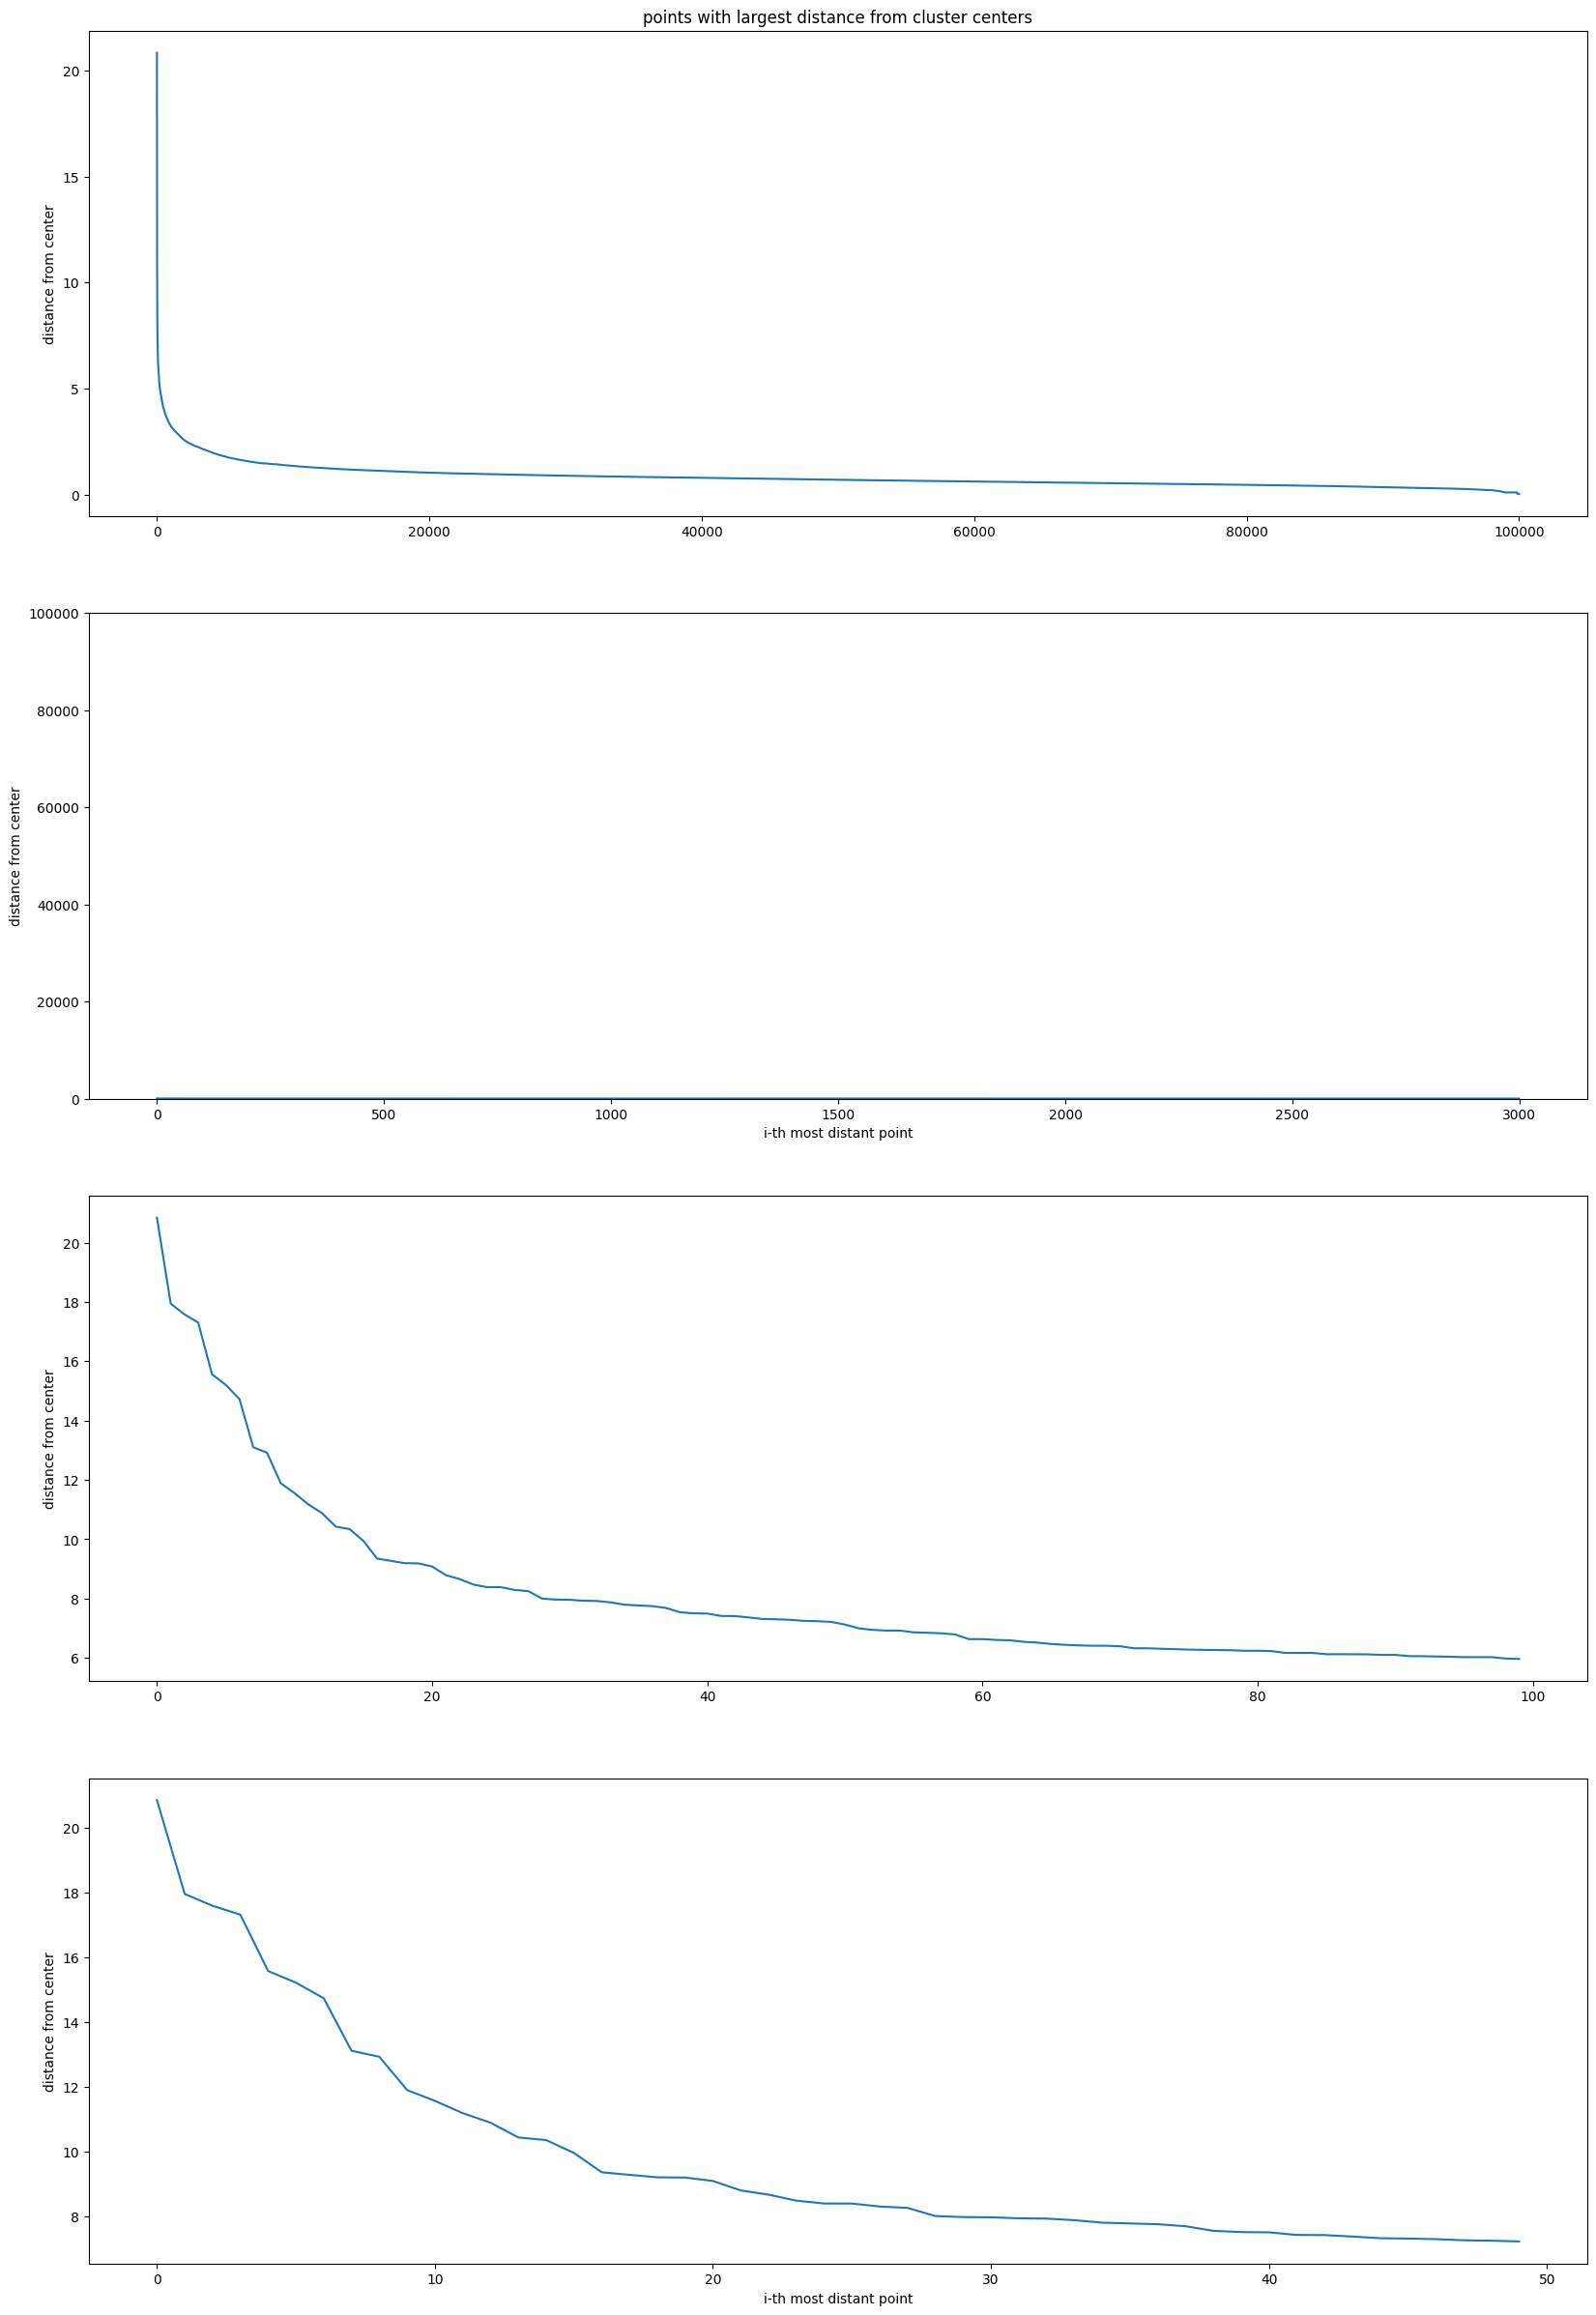

In [15]:
xx = [x[0] for x in ordered]
plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
plt.plot(xx)
plt.title("points with largest distance from cluster centers")
plt.ylabel("distance from center")

plt.subplot(4,1,2)
plt.plot(xx[:3000])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.ylim(0,100000)

plt.subplot(4,1,3)
plt.plot(xx[:100])
plt.ylabel("distance from center")

plt.subplot(4,1,4)
plt.plot(xx[:50])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.show()

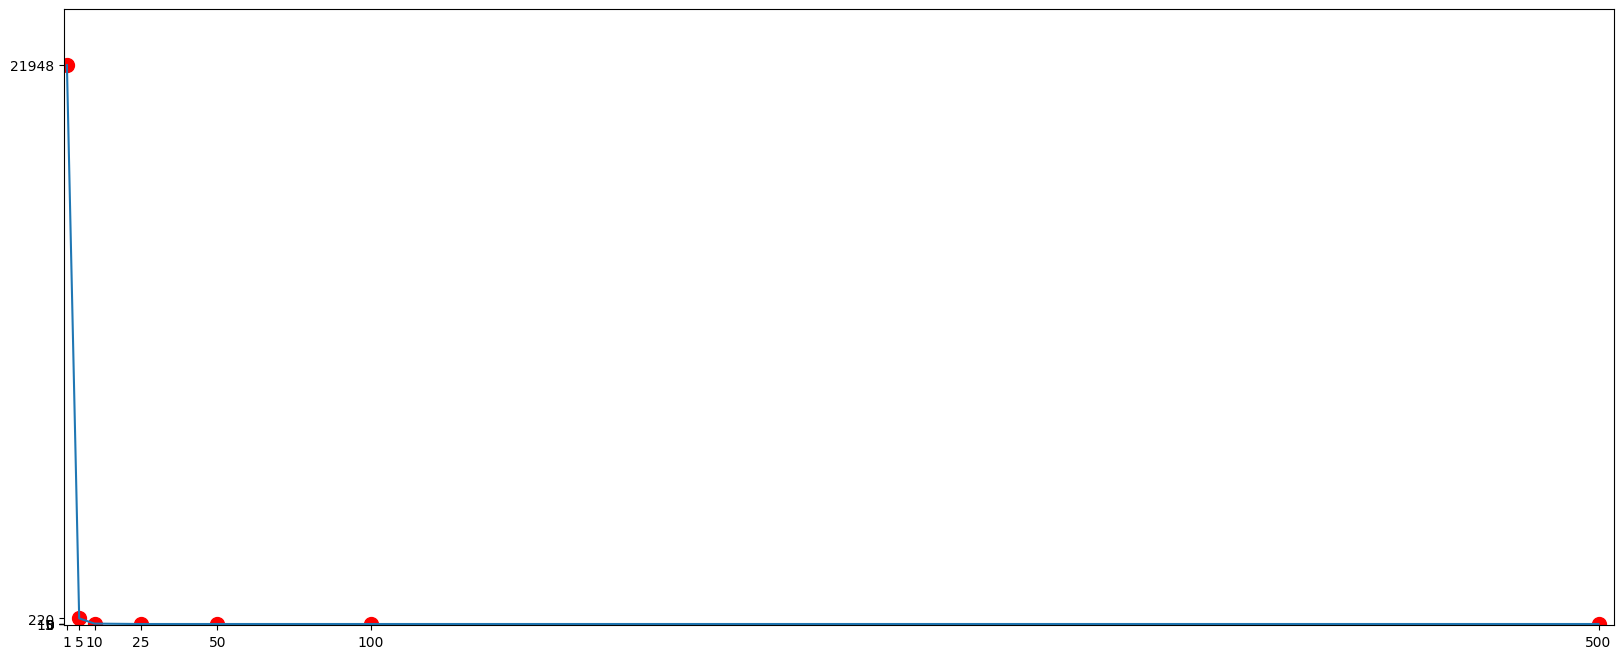

Threshold:        500	anomalous connections:     0
Threshold:        100	anomalous connections:     0
Threshold:         50	anomalous connections:     0
Threshold:         25	anomalous connections:     0
Threshold:         10	anomalous connections:    15
Threshold:          5	anomalous connections:   220
Threshold:          1	anomalous connections: 21948


In [16]:
thresholds = [500, 100, 50, 25, 10, 5, 1]
t_count = [len([__ for __ in xx if __ > _]) for _ in thresholds]

plt.figure(figsize=(20,8))
plt.scatter(thresholds, t_count, c="r", s=100)
plt.plot(thresholds, t_count)
plt.yticks(t_count)
plt.xticks(thresholds)
plt.ylim(-50, np.max(t_count)*1.1)
plt.xlim(0, np.max(thresholds)*1.01)
plt.show()

for i in range(len(thresholds)):
    print("Threshold: %10d\tanomalous connections: %5d" %(thresholds[i], t_count[i]))

In [17]:
labels = [label for label in labelsAndData[0]]
def boolToInt(b):
    if b: return 1
    return 0
labels = list(map(boolToInt,labels))
labels

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [18]:
homogeneity = m.homogeneity_score(labels,predictions)
completeness = m.completeness_score(labels,predictions)
v_measure = m.v_measure_score(labels,predictions)
print("Homogeneity score: " + str(homogeneity))
print("Completeness score: " + str(completeness))
print("V-Measure score: " + str(v_measure))

Homogeneity score: 0.13092491305804596
Completeness score: 0.01865917774890691
V-Measure score: 0.0326632492978553


In [20]:
import pickle
with open('trained_models/kmeans.pkl','wb') as f:
    pickle.dump(clusters,f)
print("Model dump complete!")

Model dump complete!
